In [2]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
import scipy as sp


In [3]:

def generate_timeseries(n_steps: int,
                        n_dims: int,
                        frequencies: list,
                        noise_amplitudes: list,
                        dt: float = 0.01,
                        seed: int = None):
    """
    Generate a multivariate time series with shape (n_steps, n_dims).

    Each component is a sine wave with a given frequency, plus Gaussian noise.

    Parameters
    ----------
    n_steps : int
        Number of time steps.
    n_dims : int
        Number of components (dimensions).
    frequencies : list of float
        List of frequencies (Hz) for each dimension.
    noise_amplitudes : list of float
        Noise standard deviation for each dimension.
    dt : float, optional
        Time step size (default: 0.01).
    seed : int, optional
        Random seed for reproducibility.

    Returns
    -------
    t : ndarray, shape (n_steps,)
        Time vector.
    X : ndarray, shape (n_steps, n_dims)
        Generated time series.
    """
    if len(frequencies) != n_dims or len(noise_amplitudes) != n_dims:
        raise ValueError("Length of frequencies and noise_amplitudes must match n_dims")

    rng = np.random.default_rng(seed)
    t = np.arange(n_steps) * dt
    X = np.zeros((n_steps, n_dims))

    for d in range(n_dims):
        signal = np.sin(2 * np.pi * frequencies[d] * t)
        noise = rng.normal(0.0, noise_amplitudes[d], size=n_steps)
        X[:, d] = signal + noise

    X[:,5] += np.concatenate((np.zeros(n_steps//2), np.full(n_steps - n_steps//2, 10.0)))

    return t, X



In [4]:
def plot_timeseries(t, X, fatidx=None):
    fig, axs = plt.subplots(1,1, figsize=(8,4))
    for traj in X.T:
        axs.plot(t, traj)
    if fatidx is not None:
        axs.plot(t, X[:,fatidx], 'k', lw=5)
    

In [5]:
np.exp(np.random.random(10)*3)

array([13.69597262, 15.04047783,  4.47036693, 11.00659642,  5.35400078,
        5.38583463,  2.26375215,  1.32325636,  1.87023337,  2.55597085])

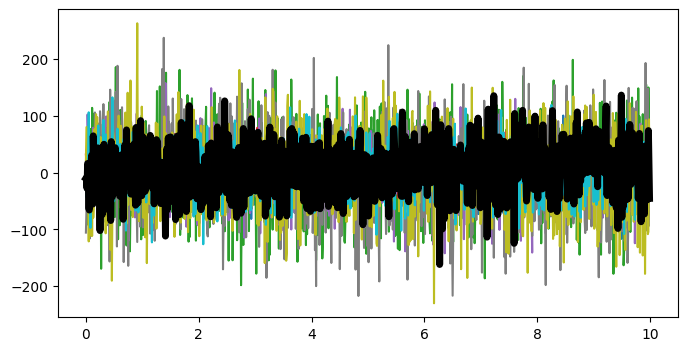

In [5]:
nsteps = 1000
t, X = generate_timeseries(
    n_steps=nsteps,
    n_dims=10,
    frequencies=np.exp(np.random.random(10)*10),
    noise_amplitudes=np.random.random(10)*100,
    dt=0.01,
    seed=42
)


plot_timeseries(t, X, 5)

#### PCA

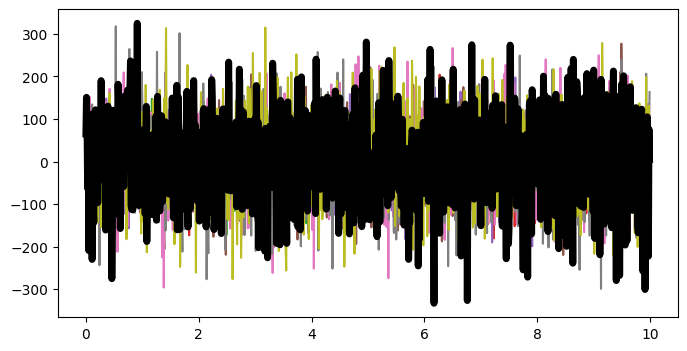

In [17]:
t, X = generate_timeseries(
    n_steps=nsteps,
    n_dims=10,
    frequencies=np.exp(np.random.random(10)*10),
    noise_amplitudes=np.random.random(10)*100,
    dt=0.01,
    seed=42
)
mu = np.mean(X, axis=0)
X_centered = X - mu
C = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(C)

plot_timeseries(t, X @ eigenvectors, -1)
#idx = np.argsort(eigenvalues)[::-1]

#### time-averaged PCA

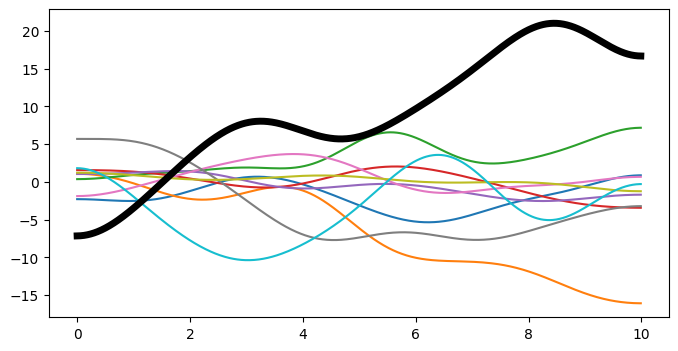

In [19]:
gaussian_sigma = nsteps/10
t, X = generate_timeseries(
    n_steps=nsteps,
    n_dims=10,
    frequencies=np.exp(np.random.random(10)*10),
    noise_amplitudes=np.random.random(10)*100,
    dt=0.01,
    seed=42
)
for i in range(X.shape[1]):
    X[:, i] = gaussian_filter1d(X[:, i], sigma=gaussian_sigma)
mu_ta = np.mean(X, axis=0)
X_centered = X - mu
C = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(C)
plot_timeseries(t, X, 5)

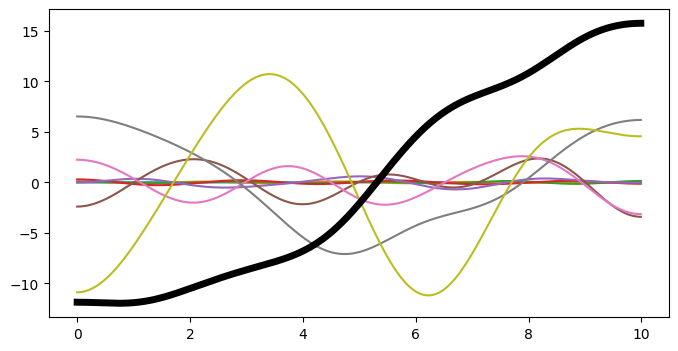

In [20]:
gaussian_sigma = nsteps/10
t, X = generate_timeseries(
    n_steps=nsteps,
    n_dims=10,
    frequencies=np.exp(np.random.random(10)*10),
    noise_amplitudes=np.random.random(10)*100,
    dt=0.01,
    seed=42
)
for i in range(X.shape[1]):
    X[:, i] = gaussian_filter1d(X[:, i], sigma=gaussian_sigma)
mu = np.mean(X, axis=0)
X_centered = X - mu
C = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(C)
plot_timeseries(t, X_centered @ eigenvectors, -1)

#### LDA

(10, 10)


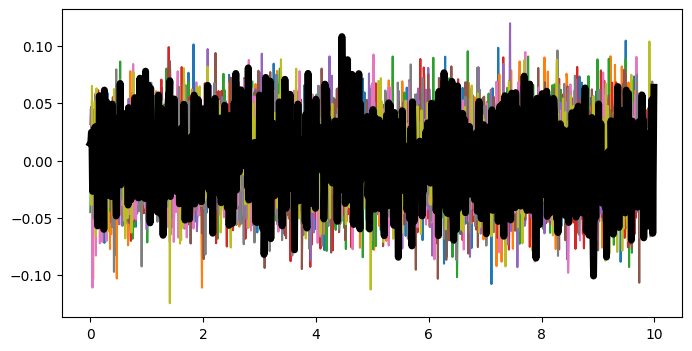

In [6]:
t, X = generate_timeseries(
    n_steps=nsteps,
    n_dims=10,
    frequencies=np.exp(np.random.random(10)*10),
    noise_amplitudes=np.random.random(10)*100,
    dt=0.01,
    seed=42
)


A = X[:nsteps//2, :]
B = X[nsteps//2:, :]
muA = np.mean(A, axis=0)
muB = np.mean(B, axis=0)
A_centered = A - muA
B_centered = B - muB
CA = np.einsum('ni,nj->ij', A_centered, A_centered)
CB = np.einsum('ni,nj->ij', B_centered, B_centered)
X_centered = X - (muA + muB)/2
mudiff = (muA - muB)
print((np.einsum('i,j->ij', mudiff, mudiff)).shape)
M = mudiff[:, None] @ mudiff[None, :]
#M = np.einsum('i,j->ij', mudiff, mudiff)
eigenvalues, eigenvectors = sp.linalg.eigh(M, CA+CB)
plot_timeseries(t, X_centered @ eigenvectors, -1)

(10, 10)


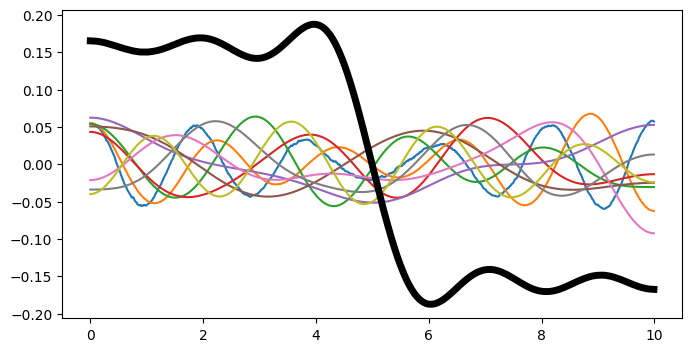

In [7]:
gaussian_sigma = nsteps/10
t, X = generate_timeseries(
    n_steps=nsteps,
    n_dims=10,
    frequencies=np.exp(np.random.random(10)*10),
    noise_amplitudes=np.random.random(10)*100,
    dt=0.01,
    seed=42
)
for i in range(X.shape[1]):
    X[:, i] = gaussian_filter1d(X[:, i], sigma=gaussian_sigma)

A = X[:nsteps//2, :]
B = X[nsteps//2:, :]
muA = np.mean(A, axis=0)
muB = np.mean(B, axis=0)
A_centered = A - muA
B_centered = B - muB
CA = np.einsum('ni,nj->ij', A_centered, A_centered)
CB = np.einsum('ni,nj->ij', B_centered, B_centered)
X_centered = X - (muA + muB)/2
mudiff = (muA - muB)
print((np.einsum('i,j->ij', mudiff, mudiff)).shape)
M = mudiff[:, None] @ mudiff[None, :]
#M = np.einsum('i,j->ij', mudiff, mudiff)
eigenvalues, eigenvectors = sp.linalg.eigh(M, CA+CB)
plot_timeseries(t, X_centered @ eigenvectors, -1)

#### LSR-PCA